In [9]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from pytorch_lightning.loggers import CSVLogger
from pytorch_lightning import Trainer
from qml_contrastive.models.hybrid.contrastive import Hybrid_Contrastive
from qml_contrastive.utils import generate_embeddings, vmf_kde_on_circle, pca_proj, tsne_proj, plot_training
from qml_contrastive.data_mnist import load_mnist_data

import matplotlib.pyplot as plt

plt.style.use('ggplot')

## MNIST Dataset

In [6]:
classes = (3, 6, 9)
reduced_dim = 10
dataset_size = (1000, 300)

mnist_data = load_mnist_data(classes=classes, reduced_dim = reduced_dim, dataset_size=dataset_size, data_dir="../data/")

def create_data_loader(data, labels, batch_size=64, shuffle=True, num_workers=4):
    dataset = TensorDataset(torch.tensor(data), torch.tensor(labels))
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)
    return data_loader

train_loader = create_data_loader(mnist_data["train_data"], mnist_data["train_labels"])
val_loader = create_data_loader(mnist_data["test_data"], mnist_data["test_labels"])

/tmp/ipykernel_11278/257462081.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset = TensorDataset(torch.tensor(data), torch.tensor(labels))


0: ─╭AngleEmbedding(M0)──RX(1.18)───RY(-1.42)──RZ(0.34)──╭●───────────────────╭X──RX(0.15)─
1: ─├AngleEmbedding(M0)──RX(1.23)───RY(-0.29)──RZ(0.05)──╰X─╭●────────────────│───RX(1.02)─
2: ─├AngleEmbedding(M0)──RX(-1.51)──RY(1.05)───RZ(1.55)─────╰X─╭●─────────────│───RX(0.58)─
3: ─├AngleEmbedding(M0)──RX(1.04)───RY(1.82)───RZ(-0.97)───────╰X─╭●──────────│───RX(1.50)─
4: ─├AngleEmbedding(M0)──RX(-0.34)──RY(-0.78)──RZ(-0.12)──────────╰X─╭●───────│───RX(-1.63)
5: ─├AngleEmbedding(M0)──RX(-0.65)──RY(-0.09)──RZ(-0.01)─────────────╰X─╭●────│───RX(-0.40)
6: ─├AngleEmbedding(M0)──RX(-0.68)──RY(-1.97)──RZ(-0.90)────────────────╰X─╭●─│───RX(1.02)─
7: ─╰AngleEmbedding(M0)──RX(-0.02)──RY(0.64)───RZ(0.46)────────────────────╰X─╰●──RX(-1.94)

───RY(0.95)───RZ(-1.17)─╭●───────────────────╭X─┤  <Z>
───RY(-0.27)──RZ(1.14)──╰X─╭●────────────────│──┤  <Z>
───RY(1.18)───RZ(0.59)─────╰X─╭●─────────────│──┤     
───RY(-2.04)──RZ(0.04)────────╰X─╭●──────────│──┤     
───RY(-0.80)──RZ(-0.95)──────────╰X─╭●─────

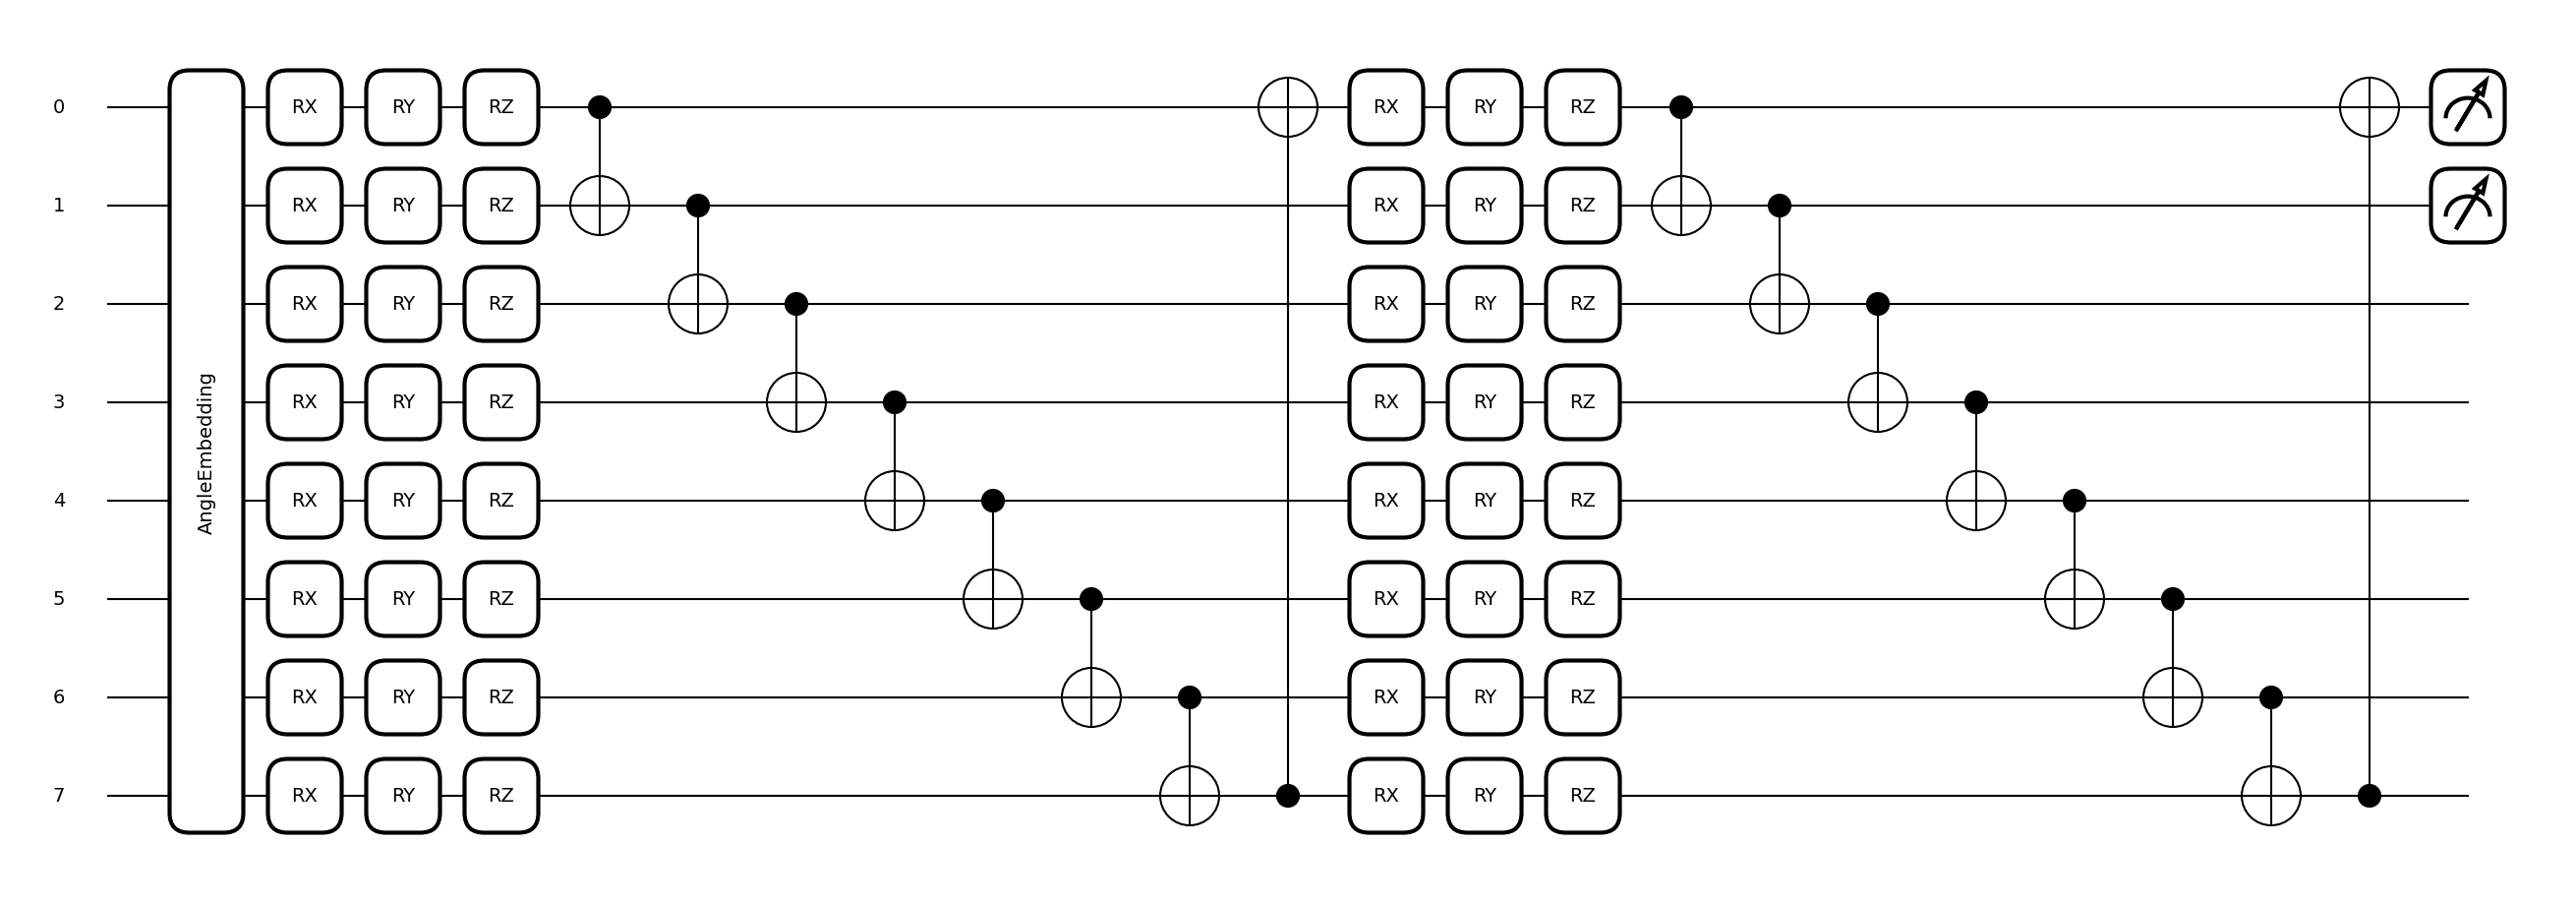

/home/ubuntu20_1/Projects_Ubuntu20/gsoc24/qml-hep/gsoc24-qml-workspace/src/qml_contrastive/utils.py:61: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(x=proj[:, 0], y=proj[:, 1], hue=labels, palette=sns.color_palette("tab10")).set(title="PCA")


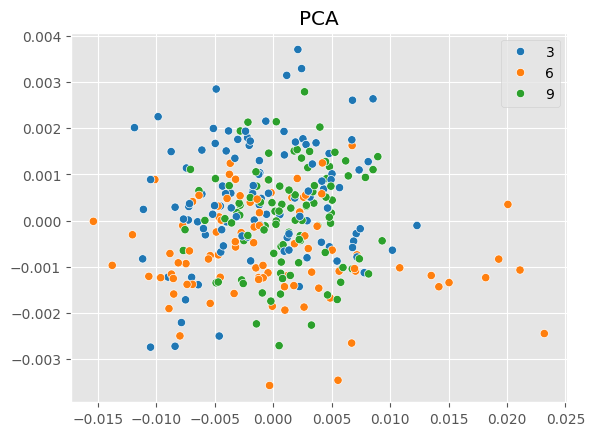

/home/ubuntu20_1/Projects_Ubuntu20/gsoc24/qml-hep/gsoc24-qml-workspace/src/qml_contrastive/utils.py:74: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(x=proj[:, 0], y=proj[:, 1], hue=labels, palette=sns.color_palette("tab10")).set(title="T-SNE")


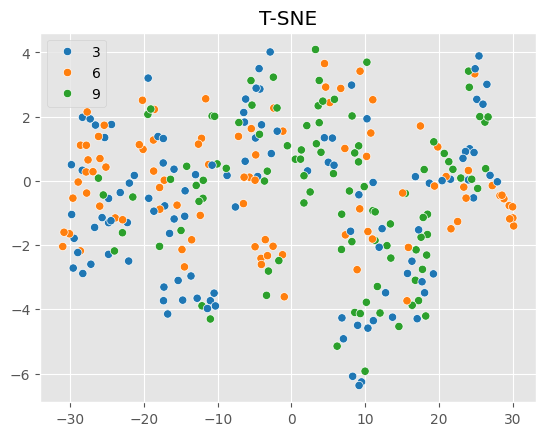

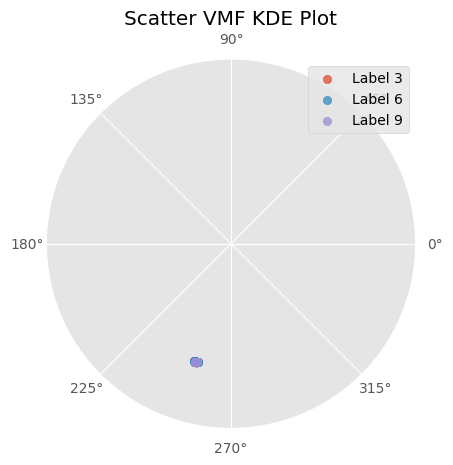

/home/ubuntu20_1/Miniconda3/envs/py39_qml/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:478: LightningDeprecationWarning: Setting `Trainer(gpus=0)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=0)` instead.
  rank_zero_deprecation(
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ubuntu20_1/Miniconda3/envs/py39_qml/lib/python3.9/site-packages/pytorch_lightning/trainer/setup.py:176: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
/home/ubuntu20_1/Miniconda3/envs/py39_qml/lib/python3.9/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:613: UserWarning: Checkpoint directory logs/MNISTQContrast/version_0/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory

Sanity Checking: 0it [00:00, ?it/s]

/home/ubuntu20_1/Miniconda3/envs/py39_qml/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:488: PossibleUserWarning: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test/predict dataloaders.
  rank_zero_warn(


/home/ubuntu20_1/Miniconda3/envs/py39_qml/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1609: PossibleUserWarning: The number of training batches (16) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 9: 100%|██████████| 21/21 [00:01<00:00, 11.82it/s, loss=0.958, v_num=0, val_loss=1.160, train_loss=0.946]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 21/21 [00:01<00:00, 11.74it/s, loss=0.958, v_num=0, val_loss=1.160, train_loss=0.946]


/home/ubuntu20_1/Projects_Ubuntu20/gsoc24/qml-hep/gsoc24-qml-workspace/src/qml_contrastive/utils.py:61: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(x=proj[:, 0], y=proj[:, 1], hue=labels, palette=sns.color_palette("tab10")).set(title="PCA")


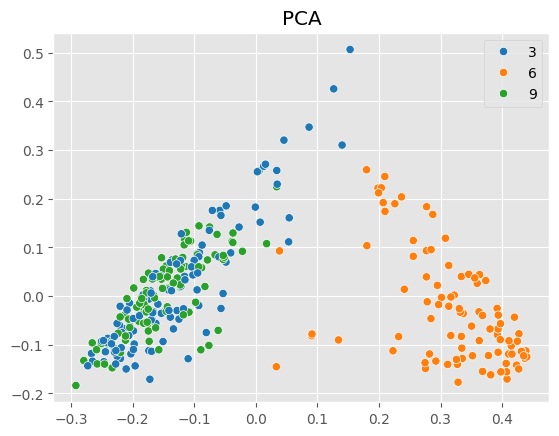

/home/ubuntu20_1/Projects_Ubuntu20/gsoc24/qml-hep/gsoc24-qml-workspace/src/qml_contrastive/utils.py:74: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(x=proj[:, 0], y=proj[:, 1], hue=labels, palette=sns.color_palette("tab10")).set(title="T-SNE")


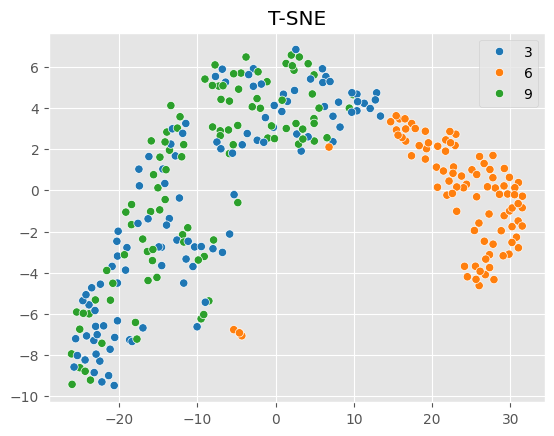

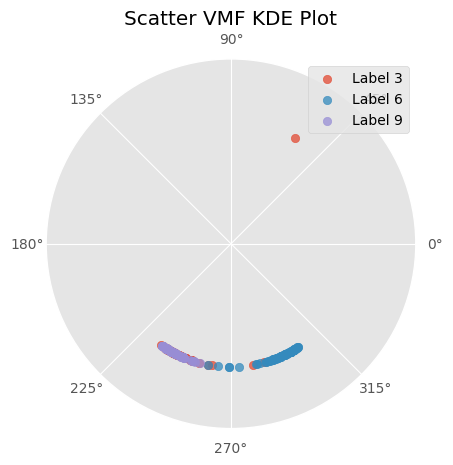

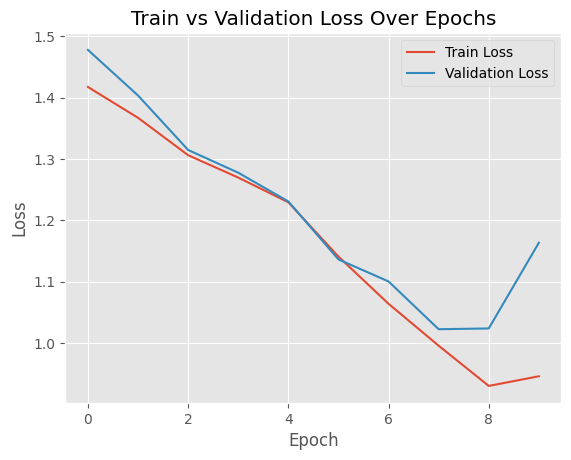

In [10]:
model = Hybrid_Contrastive(activ_type="relu", pool_type="max", n_qubits=8, head_output=2, lr=1e-3, n_qlayers=2)

# Plot embeddings before training
embeddings, labels = generate_embeddings(model, val_loader)
pca_proj(embeddings, labels)
tsne_proj(embeddings, labels)
vmf_kde_on_circle(embeddings, labels)

# Training the model
logger = CSVLogger(save_dir="logs/", name="MNISTQContrast", version=0)
trainer = Trainer(max_epochs=10, logger=logger, gpus=0)
trainer.fit(model, train_loader, val_loader)

# Plot embeddings after training
embeddings, labels = generate_embeddings(model, val_loader)
pca_proj(embeddings, labels)
tsne_proj(embeddings, labels)
vmf_kde_on_circle(embeddings, labels)

plot_training(logger.log_dir)